**LetsGrowMore Virtual Internship Program (VIP) - December 2022**

**Beginner Level**

**Task-3 : Music Recommendation**

**Name : Sarvesh Rane**




In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Loading The Necessary CSV Files 
songs=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/songs.csv")
members=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/members.csv")
training=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [3]:
# Showing The First 5 Values of songs, members & training Dataset Respectively
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [4]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
training.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [7]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


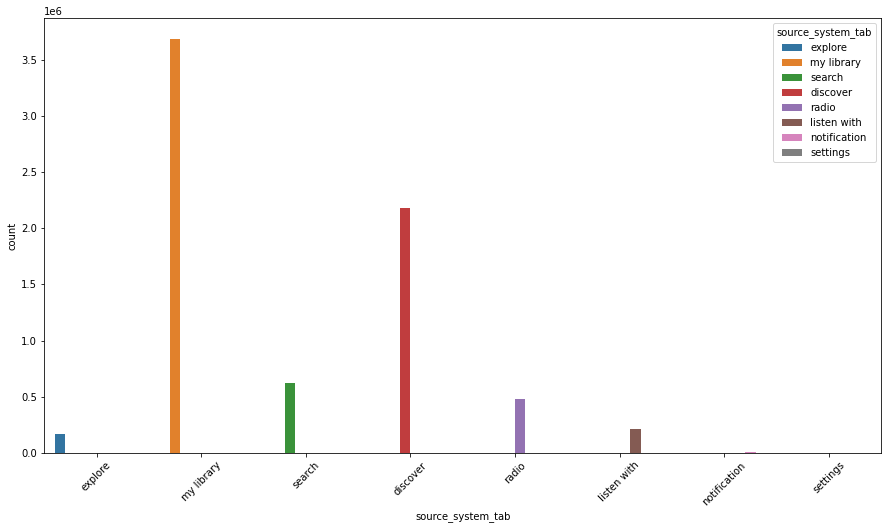

In [8]:
# Visualising The Dataset With A Graph
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='source_system_tab',hue='source_system_tab',data=training)

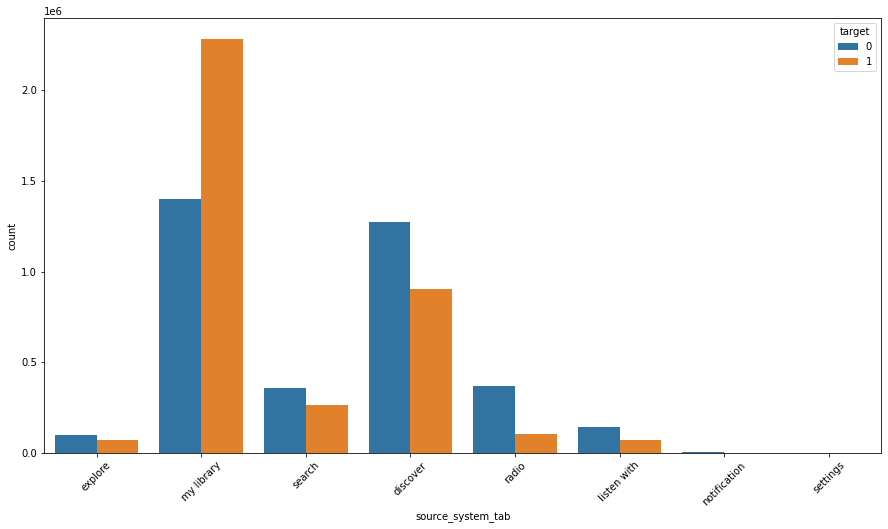

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='source_system_tab',hue='target',data=training)

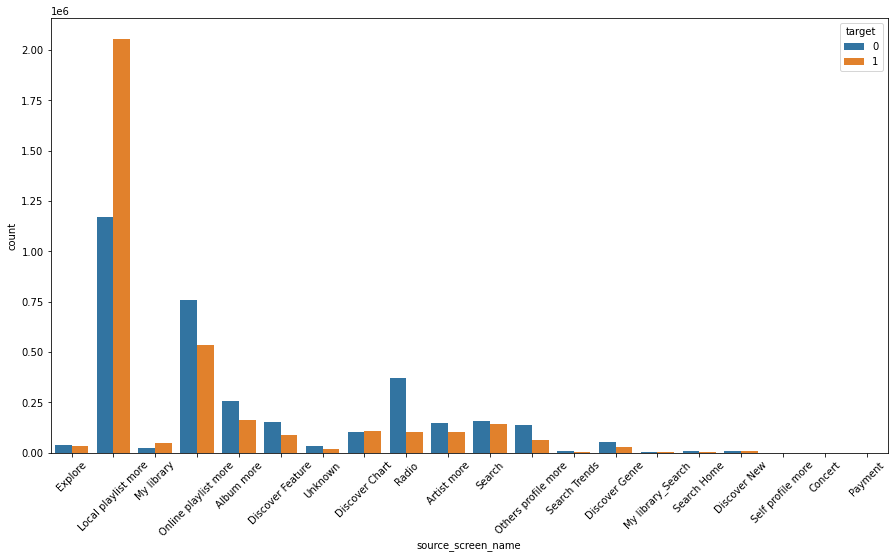

In [10]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='source_screen_name',hue='target',data=training)

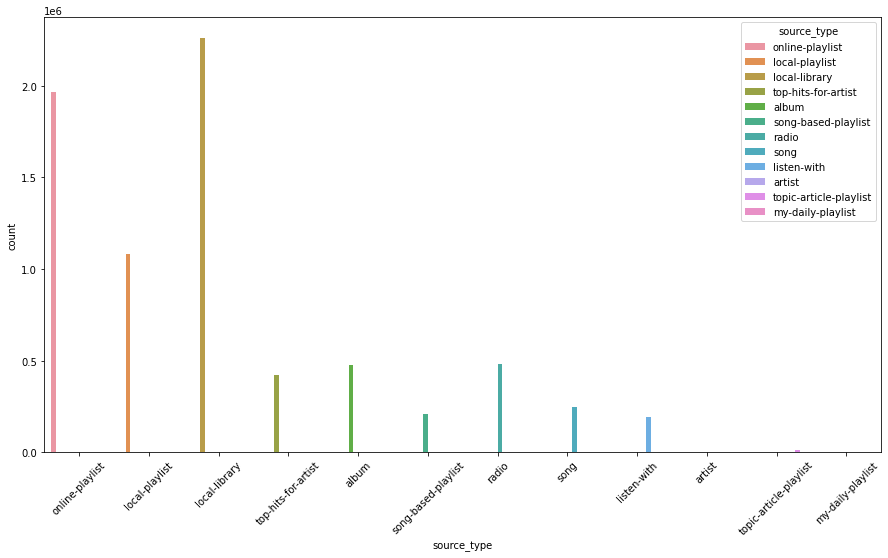

In [11]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='source_type',hue='source_type',data=training)

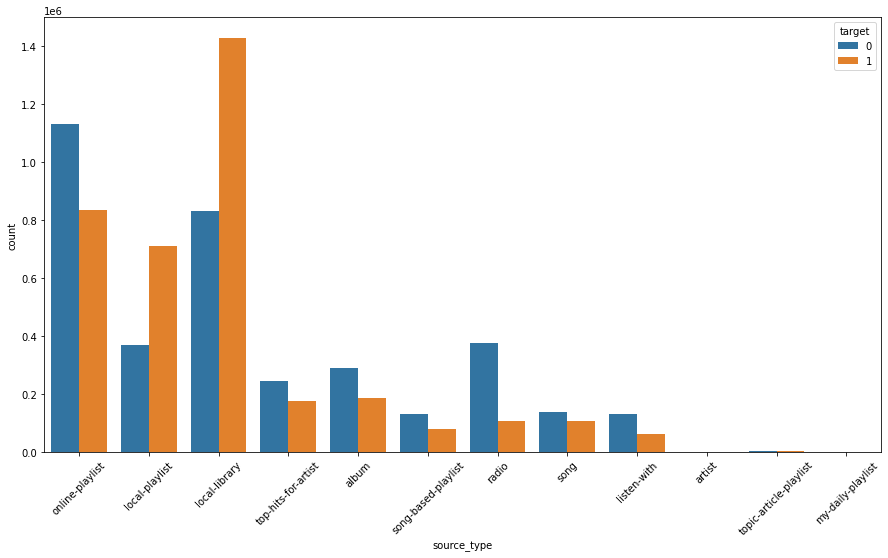

In [12]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='source_type',hue='target',data=training)

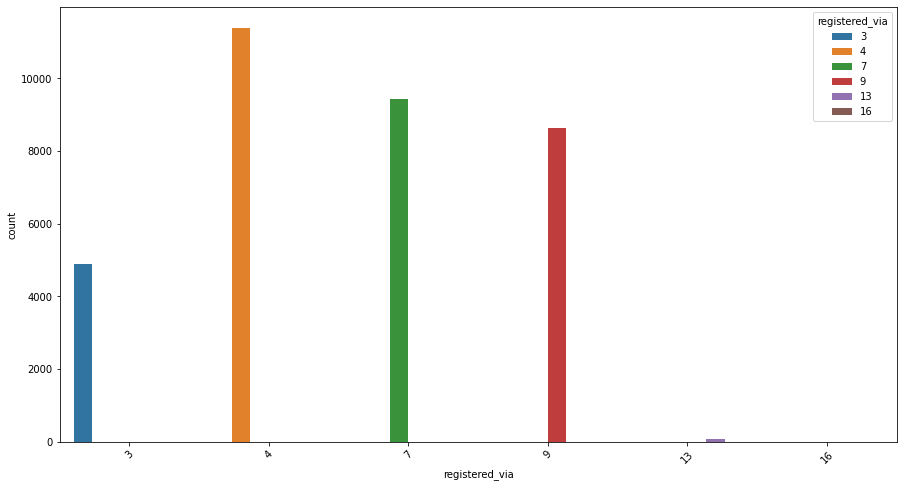

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='registered_via',hue='registered_via',data=members)


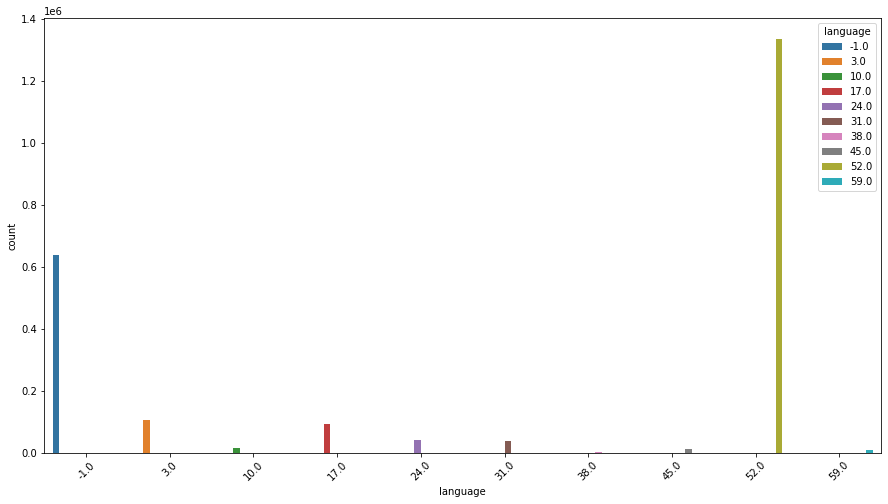

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sb.countplot(x='language',hue='language',data=songs)


In [16]:
# Cleaning The Dataset & Removing Unwanted Features/Values
new_ts=3000
new_tr=7000
cols=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test_temp=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv",names=cols,skiprows=new_tr,nrows=new_ts)
testing=test_temp.drop(['target'],axis=1)
new_ytr=np.array(test_temp['target'])

In [17]:
test_name=['id','msno','song_id','source_system_tab','source_screen_name','source_type']
testing['id']=np.arange(new_ts)
testing=testing[test_name]

In [18]:
cols_song = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
training = training.merge(songs[cols_song], on='song_id', how='left')
testing = testing.merge(songs[cols_song], on='song_id', how='left')

In [19]:
members['registration_year']=members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month']=members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date']=members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [20]:
training=training.fillna(-1)
testing=testing.fillna(-1)
import gc
del members,songs;gc.collect();
cols=list(training.columns)
cols.remove('target')

In [21]:
# Using tqdm For Progress Bar and Then Encoding The Values  
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if training[col].dtype == "object":
        training[col] = training[col].apply(str)
        testing[col] = testing[col].apply(str)
        le = LabelEncoder()
        train_vals = list(training[col].unique())
        test_vals = list(testing[col].unique())
        le.fit(train_vals + test_vals)
        training[col] = le.transform(training[col])
        testing[col] = le.transform(testing[col])

100%|██████████| 9/9 [00:42<00:00,  4.75s/it]


In [22]:
unique_songs = range(max(training['song_id'].max(), testing['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = training.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = testing.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [23]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Creating The Model For Music Recommendation
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(training.drop(['target'], axis=1))
Y = training['target'].values
X_test = np.array(testing.drop(['id'], axis=1))
ids = testing['id'].values
del training, testing; gc.collect();
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size=0.1, random_state = 12)
del X, Y; gc.collect();
train_d = lgb.Dataset(X_train, label=Y_train)
test_d = lgb.Dataset(X_Test, label=Y_Test) 
watchlist = [train_d,test_d]

In [25]:
def predict(m1_model):
    model = m1_model.fit(X_train,Y_train)
    print('Training Score For Training Data Is -> {}'.format(model.score(X_train,Y_train)))
    y_pred = model.predict(X_Test)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==new_ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Model Accuracy For Test Data Is ->", acc)

In [30]:
from sklearn.linear_model import LogisticRegression
predict(LogisticRegression())

Training Score For Training Data Is -> 0.5135474984020305
Model Accuracy For Test Data Is -> 65.03333333333333


In [27]:
# Predicting The Results Using lightgbm And Displaying The Accuracy Of The Final Result
params={}
params['application']=0.4
params['max_depth']=15
params['verbosity']=0
params['application']='binary'
params['metric']='auc'
params['num_leaves']=2**8
model=lgb.train(params,train_set=train_d,num_boost_round=200,valid_sets=watchlist,early_stopping_rounds=10,verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.677555	valid_1's auc: 0.677449
[20]	training's auc: 0.682483	valid_1's auc: 0.682153
[30]	training's auc: 0.686311	valid_1's auc: 0.685698
[40]	training's auc: 0.689653	valid_1's auc: 0.688763
[50]	training's auc: 0.692511	valid_1's auc: 0.691429
[60]	training's auc: 0.695118	valid_1's auc: 0.693859
[70]	training's auc: 0.697074	valid_1's auc: 0.695578
[80]	training's auc: 0.69881	valid_1's auc: 0.697089
[90]	training's auc: 0.700197	valid_1's auc: 0.698211
[100]	training's auc: 0.701589	valid_1's auc: 0.699401
[110]	training's auc: 0.702905	valid_1's auc: 0.700459
[120]	training's auc: 0.703923	valid_1's auc: 0.701246
[130]	training's auc: 0.70479	valid_1's auc: 0.701891
[140]	training's auc: 0.705747	valid_1's auc: 0.702601
[150]	training's auc: 0.706633	valid_1's auc: 0.703267
[160]	training's auc: 0.707553	valid_1's auc: 0.703995
[170]	training's auc: 0.708485	valid_1's auc: 0.704693
[180]	training

In [29]:
prediction=model.predict(X_test)
yhat=(prediction>0.5).astype(int)
comp=(yhat==new_ytr).astype(int)
accuracy=comp.sum()/comp.size*100
print("The Prediction Accuracy Of The Model -> {0:f} %".format(accuracy))

The Prediction Accuracy Of The Model -> 78.666667 %
